## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
def build_mlp():
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model
model = build_mlp()

Instructions for updating:
Colocations handled automatically by placer.


In [5]:
"""
Compile 模型
"""
model.summary()

optimizer = keras.optimizers.Adam(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [6]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 4s 82us/step - loss: 1.9412 - acc: 0.3031 - val_loss: 1.7798 - val_acc: 0.3628
Epoch 2/500
50000/50000 [==============================] - 3s 53us/step - loss: 1.7058 - acc: 0.3895 - val_loss: 1.6995 - val_acc: 0.3956
Epoch 3/500
50000/50000 [==============================] - 3s 54us/step - loss: 1.6258 - acc: 0.4198 - val_loss: 1.6187 - val_acc: 0.4157
Epoch 4/500
50000/50000 [==============================] - 3s 52us/step - loss: 1.5517 - acc: 0.4457 - val_loss: 1.5369 - val_acc: 0.4490
Epoch 5/500
50000/50000 [==============================] - 3s 51us/step - loss: 1.5058 - acc: 0.4625 - val_loss: 1.5184 - val_acc: 0.4592
Epoch 6/500
50000/50000 [==============================] - 3s 51us/step - loss: 1.4646 - acc: 0.4775 - val_loss: 1.4985 - val_acc: 0.4663
Epoch 7/500
50000/50000 [==============================] - 3s 51us/step - 

Epoch 116/500
50000/50000 [==============================] - 3s 53us/step - loss: 0.2425 - acc: 0.9129 - val_loss: 3.3922 - val_acc: 0.4980
Epoch 117/500
50000/50000 [==============================] - 3s 53us/step - loss: 0.2780 - acc: 0.9004 - val_loss: 3.4357 - val_acc: 0.4928
Epoch 118/500
50000/50000 [==============================] - 3s 52us/step - loss: 0.2189 - acc: 0.9213 - val_loss: 3.4592 - val_acc: 0.4927
Epoch 119/500
50000/50000 [==============================] - 3s 53us/step - loss: 0.2271 - acc: 0.9183 - val_loss: 3.4010 - val_acc: 0.4889
Epoch 120/500
50000/50000 [==============================] - 3s 52us/step - loss: 0.2457 - acc: 0.9116 - val_loss: 3.3964 - val_acc: 0.4963
Epoch 121/500
50000/50000 [==============================] - 3s 52us/step - loss: 0.2572 - acc: 0.9067 - val_loss: 3.5005 - val_acc: 0.4942
Epoch 122/500
50000/50000 [==============================] - 3s 53us/step - loss: 0.2413 - acc: 0.9130 - val_loss: 3.4633 - val_acc: 0.4984
Epoch 123/500
50000/

50000/50000 [==============================] - 3s 52us/step - loss: 0.1099 - acc: 0.9624 - val_loss: 4.7396 - val_acc: 0.4821
Epoch 233/500
50000/50000 [==============================] - 3s 52us/step - loss: 0.1998 - acc: 0.9343 - val_loss: 4.5624 - val_acc: 0.4910
Epoch 234/500
50000/50000 [==============================] - 3s 51us/step - loss: 0.2346 - acc: 0.9247 - val_loss: 4.5445 - val_acc: 0.4850
Epoch 235/500
50000/50000 [==============================] - 3s 53us/step - loss: 0.1519 - acc: 0.9473 - val_loss: 4.6434 - val_acc: 0.4846
Epoch 236/500
50000/50000 [==============================] - 3s 53us/step - loss: 0.0930 - acc: 0.9678 - val_loss: 4.7656 - val_acc: 0.4902
Epoch 237/500
50000/50000 [==============================] - 3s 52us/step - loss: 0.0903 - acc: 0.9690 - val_loss: 4.6398 - val_acc: 0.4871
Epoch 238/500
50000/50000 [==============================] - 3s 53us/step - loss: 0.0617 - acc: 0.9788 - val_loss: 4.6568 - val_acc: 0.4910
Epoch 239/500
50000/50000 [=======

50000/50000 [==============================] - 3s 51us/step - loss: 0.0440 - acc: 0.9847 - val_loss: 5.0467 - val_acc: 0.4892
Epoch 349/500
50000/50000 [==============================] - 3s 52us/step - loss: 0.1256 - acc: 0.9594 - val_loss: 5.1568 - val_acc: 0.4832
Epoch 350/500
50000/50000 [==============================] - 3s 52us/step - loss: 0.1902 - acc: 0.9430 - val_loss: 5.0032 - val_acc: 0.4794
Epoch 351/500
50000/50000 [==============================] - 3s 52us/step - loss: 0.0818 - acc: 0.9727 - val_loss: 4.9267 - val_acc: 0.4884
Epoch 352/500
50000/50000 [==============================] - 3s 52us/step - loss: 0.0580 - acc: 0.9802 - val_loss: 4.9882 - val_acc: 0.4936
Epoch 353/500
50000/50000 [==============================] - 3s 51us/step - loss: 0.0493 - acc: 0.9835 - val_loss: 5.1297 - val_acc: 0.4878
Epoch 354/500
50000/50000 [==============================] - 3s 52us/step - loss: 0.0925 - acc: 0.9695 - val_loss: 5.0254 - val_acc: 0.4891
Epoch 355/500
50000/50000 [=======

50000/50000 [==============================] - 3s 51us/step - loss: 0.0382 - acc: 0.9870 - val_loss: 5.3586 - val_acc: 0.4899
Epoch 465/500
50000/50000 [==============================] - 3s 51us/step - loss: 0.0435 - acc: 0.9853 - val_loss: 5.3108 - val_acc: 0.4938
Epoch 466/500
50000/50000 [==============================] - 3s 51us/step - loss: 0.0725 - acc: 0.9765 - val_loss: 5.3872 - val_acc: 0.4839
Epoch 467/500
50000/50000 [==============================] - 3s 52us/step - loss: 0.1688 - acc: 0.9496 - val_loss: 5.3742 - val_acc: 0.4829
Epoch 468/500
50000/50000 [==============================] - 3s 52us/step - loss: 0.1243 - acc: 0.9624 - val_loss: 5.4176 - val_acc: 0.4838
Epoch 469/500
50000/50000 [==============================] - 3s 52us/step - loss: 0.0734 - acc: 0.9763 - val_loss: 5.3409 - val_acc: 0.4874
Epoch 470/500
50000/50000 [==============================] - 3s 51us/step - loss: 0.0517 - acc: 0.9825 - val_loss: 5.3698 - val_acc: 0.4891
Epoch 471/500
50000/50000 [=======

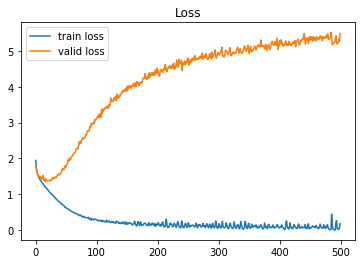

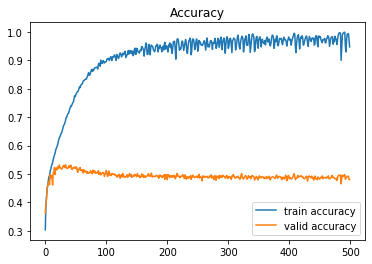

In [8]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

In [9]:
optimizer = keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [10]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=100, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 3s 52us/step - loss: 0.0318 - acc: 0.9902 - val_loss: 5.3794 - val_acc: 0.4923
Epoch 2/100
50000/50000 [==============================] - 2s 47us/step - loss: 0.0107 - acc: 0.9973 - val_loss: 5.4351 - val_acc: 0.4928
Epoch 3/100
50000/50000 [==============================] - 2s 48us/step - loss: 0.0048 - acc: 0.9991 - val_loss: 5.4817 - val_acc: 0.4964
Epoch 4/100
50000/50000 [==============================] - 2s 47us/step - loss: 0.0037 - acc: 0.9994 - val_loss: 5.4877 - val_acc: 0.4965
Epoch 5/100
50000/50000 [==============================] - 2s 48us/step - loss: 0.0020 - acc: 0.9999 - val_loss: 5.5046 - val_acc: 0.4977
Epoch 6/100
50000/50000 [==============================] - 2s 49us/step - loss: 0.0014 - acc: 1.0000 - val_loss: 5.5310 - val_acc: 0.4963
Epoch 7/100
50000/50000 [==============================] - 2s 47us/step - loss: 0.0012 - acc: 1.0000 - val_loss: 5.5392 - 

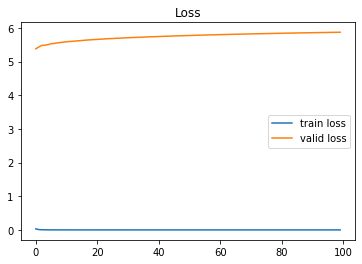

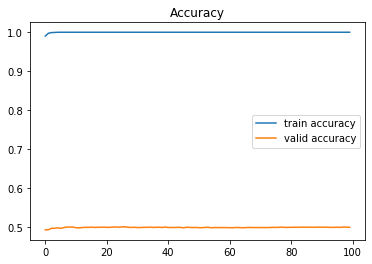

In [11]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()